## Setups

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets       # interactive display
from numpy.linalg import eigh

In [ ]:
lambdas = np.array([1, 0.8, 0.5]).reshape((-1,1)) # shared noise spectrum
n = len(lambdas) # shared (latent) noise dimension
N = 20 # neurons
T = 500 # recorded datapoints

def set_true_ensambles():
  C = np.clip(np.random.randn(N,n)**3,-1,1) # latent space projection
  C[:2,1:] = 0
  C[:2,0] = 1 # first two example neurons align with the PC0
  # plt.imshow(C,vmin=-1,vmax=+1,cmap='RdBu')
  return C

def generate_data(C,random_seed=0):
  #generate synthetic data

  np.random.seed(random_seed)

  z = np.random.randn(n,T) * lambdas # shared (latent) noise
  dx = 0.5*np.random.randn(N,T) # private single-neuron noise
  fr = np.random.rand(N).reshape((-1,1)) * 20 # avg fr in Hz
  dfr = np.random.rand(N).reshape((-1,1)) * 10 # fr changes in Hz
  z_scored_x = (C @ z + dx)
  x = z_scored_x * dfr + fr

  return x.T

# Intro: Large scale population recordings

Methods
Scaling law

Example

## How to make sense of these data?



![two model types](https://drive.google.com/uc?export=view&id=16G4HWvarW8rtNlBSlnCvCIcJq78Pr7Lu)

In this tutorial, we will focus on the second class of models: the **latent variable** models. 
These models are useful for understanding modern single-unit recordings, which can have 100-1000-10000 of recorded neurons simultaneously. We can't visualize or analyse such high-dimensional data directly!


# Projecting neuronal data onto a vector (linear algebra refresher)

We were watching two neurons in the demonstration above and noticed that their activity is highly correlated. They generally tend to fire together!

We binnned.... and plotted neuron's firing rate one against the other.

Text(0, 0.5, 'firing rate of neuron #1, Hz')

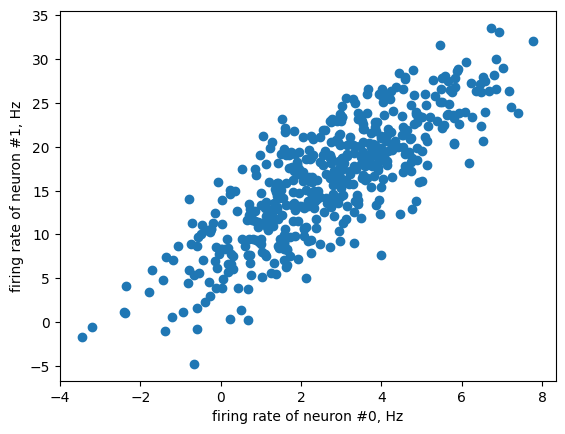

In [ ]:
C = set_true_ensambles()
x = generate_data(C)[:,:2]

plt.scatter(x[:,0],x[:,1])
plt.xlabel('firing rate of neuron #0, Hz')
plt.ylabel('firing rate of neuron #1, Hz')

In [ ]:
# z_scored_x = ((x - x.mean(0)) / x.std(0)) # TODO: remove solution

# plt.scatter(*z_scored_x.T)
# plt.xlabel('z-score activity neuron #0')
# plt.ylabel('z-score activity neuron #1')

## Describing the joint neuronal activity with a multivariate Gaussian

The joint distribution of activity of these 2 neurons resemble a multivariate Gaussian, which typically looks like this:
![multivariate gaussian from wiki](https://drive.google.com/uc?export=view&id=1MFTd71NlwnxxLlPx0bcGMb4MLpoNrJ_h)

A multivariate N-dimensional Gaussian is characterized by 2 sets of parameters:
* the mean $\mathbf{\mu}$ (a $[N]$-dimensional vector)
* the covariance $\Sigma$ (an $[N \times N]$ matrix)

One of the simplest ways to fit the Gaussian distribution to the data is *via* so-called **moment-matching**: calculating means, variances and co-variances of the datapoints.

First we'll calculate the mean $\mathbf{\mu} = \mathop{\mathbb{E}}\mathbf{x} = \sum_{i=1}^n \mathbf{x}_i / n $ (a 2D vector for 2 neurons)

In [ ]:
mu = x.mean(0) # TODO: remove solution
mu

array([ 2.67971149, 16.31090977])

#### **Think!** What is the physical meaning of this mean? 

Firing rate

#### Covariance

Next, we calculate the covariance matrix for these neurons $\Sigma = \mathop{\mathbb{E}} (\mathbf{x}-\mathbf{\mu})^2 = \sum_{i=1}^n (\mathbf{x}_i - \mathbf{\mu})^T(\mathbf{x}_i - \mathbf{\mu}) / n$

In [ ]:
cov = (x-mu).T @ (x-mu) / T #TODO: remove solution
cov

array([[ 3.86309847, 10.86864409],
       [10.86864409, 45.94937714]])

# WHITEBOARD!

LINK EIGENDECOMP TO BASIS

In [ ]:
w,v = eigh(cov)
v

array([[-0.97172235,  0.23612639],
       [ 0.23612639,  0.97172235]])

Text(0, 0.5, 'firing rate of neuron #1, Hz')

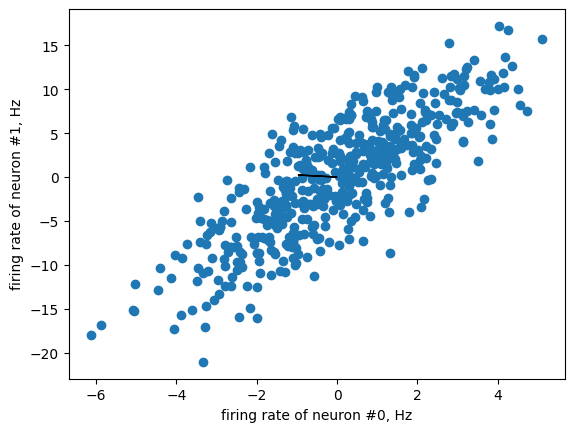

In [ ]:
plt.scatter(*(x-mu).T)
plt.arrow(0,0,*(v[0]))
plt.xlabel('firing rate of neuron #0, Hz')
plt.ylabel('firing rate of neuron #1, Hz')

### Visualize the multivariate gaussian

The *probability density function* for the multivariate Gaussian is proportional to:

$$\mathrm{pdf}(x) \propto \exp(-\mathbf{x}^T \Sigma^{-1} \mathbf{x})$$

*We are not interested in the absolute value of the probability here, only how it depends on $\mathbf{x}$.* Knowing this, we can compute the shape of the percentile ...



## Relationship with a gaussian distribution

In [ ]:
# TODO: illustrate 

# Principle component analysis (PCA)

Hypothesis: large variance is important -> preserving the largest variance

## Step-by-step

Z-score data, so that all neurons -- fast or slow spiking -- are equal

(500, 20)


Text(0, 0.5, 'neuron #')

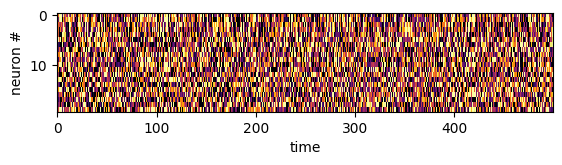

In [ ]:
C = set_true_ensambles()
x = generate_data(C)
print(x.shape)
z_scored_x = ((x - x.mean(0)) / x.std(0)) # TODO: remove solution

plt.imshow(z_scored_x.T,vmin=-1,vmax=1,aspect=5,interpolation='None',cmap='inferno')
plt.xlabel('time')
plt.ylabel('neuron #')

Compute the covariance

$$X X^T$$

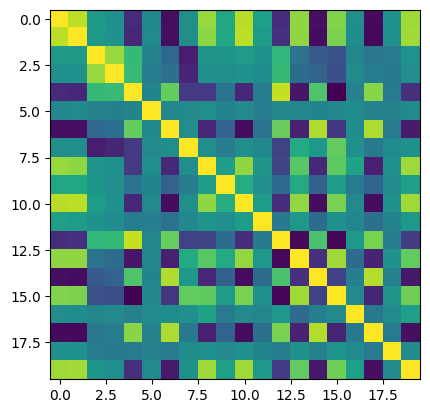

In [ ]:
cov = z_scored_x.T @ z_scored_x / T

plt.imshow(cov)

Text(0, 0.5, 'eigenvalue')

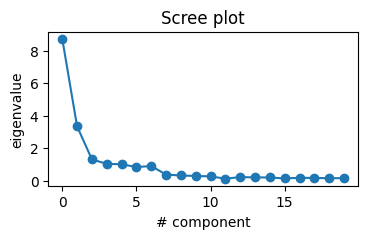

In [ ]:
w,v = eig(cov)

plt.figure(figsize=(4,2))
plt.plot(w)
plt.scatter(np.arange(len(w)),w)
plt.title('Scree plot')
plt.xlabel('# component')
plt.ylabel('eigenvalue')

Identifying population vectors

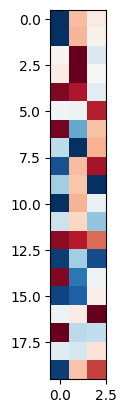

In [ ]:
plt.imshow(v[:,:3],vmin=-.3,vmax=+.3,cmap='RdBu')

Identifying ensambles (TODO: ask Tom for a link)

## Using *sklearn*

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pcs = pca.fit_transform(z_scored_x) # TODO: set a trap for non-z-scored data
pcs.shape

(500, 3)

In [ ]:
pca.singular_values_

array([66.08301667, 40.89516575, 25.60303226])

In [ ]:
pca.explained_variance_ratio_

array([0.43669651, 0.16724146, 0.06555153])

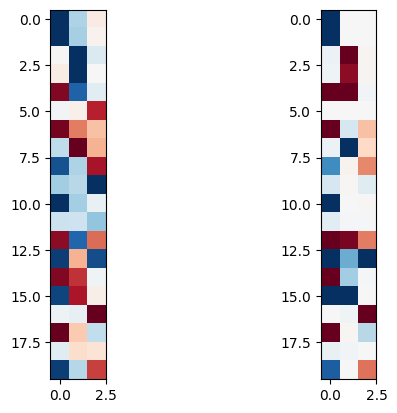

In [ ]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(pca.components_.T,vmin=-.3,vmax=+.3,cmap='RdBu')
ax[1].imshow(C,vmin=-1,vmax=+1,cmap='RdBu')

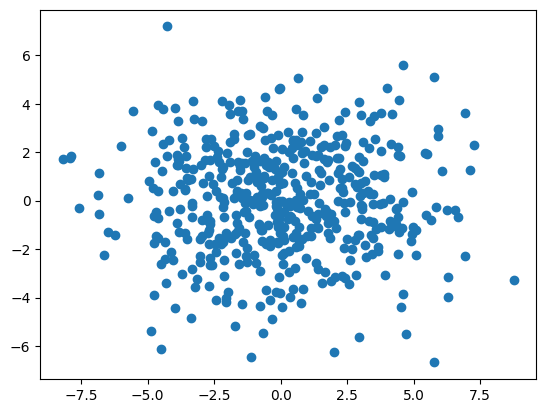

In [ ]:
plt.scatter(*pcs[:,[0,1]].T)

Notes from NMS:
1. terms: orthonormal bases, changing bases, and correlation


# Move to Dynamics

At the same time, it was shown that neural population activity often has a low-dimensional structure: a low number of latent dynamical factors can explain a large fraction of neural variability. This finding is called a *'manifold hypothesis'*, and was proposed in [Vyas et al. 2020](#references).